In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression

# Generate some sparse data to play with
# 200 data points, 50 samples, but will elim nonrepresentative data points
n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0 # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

In [2]:
# Linear regression
# make class
lr = LinearRegression()
# fits model to training data set, then predict y based on test x
y_pred_lr = lr.fit(X_train, y_train).predict(X_test)
# rsquared score or pearson correlation coeff
r2_score_lr = r2_score(y_test, y_pred_lr)
print(r2_score_lr)

0.1927747880422146


In [3]:
# Lasso
# adjust alpha (roughly lambda) for better PE
alpha = 0.8
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(r2_score_lasso)

0.23739899493052763


In [4]:
# ElasticNet
# adjust l1_ratio for better PE. alpha is overall regulariz strength. 
# l1 regulariz=alpha*l1ratio. l2 regulariz is alpha*(1-l1 ratio) 
enet = ElasticNet(alpha=alpha, l1_ratio=0.9)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(r2_score_enet)

0.2017842553194248


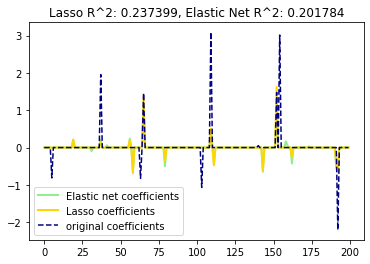

In [5]:
# check if model can predict sth and if that effect is from choosing correct variable
# x axis is each variable, y is beta weight. green and yellow should track with certain dashed (means they picked that var)
# perfect model would completely track the dashed line. irl cant do this plot bc dont know dashed line.
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()